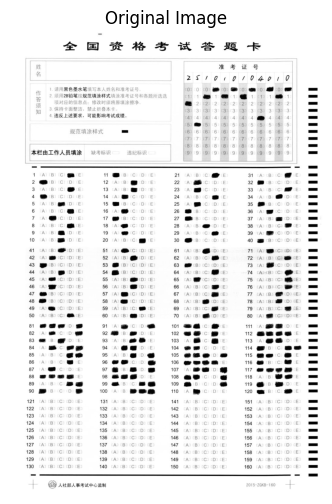

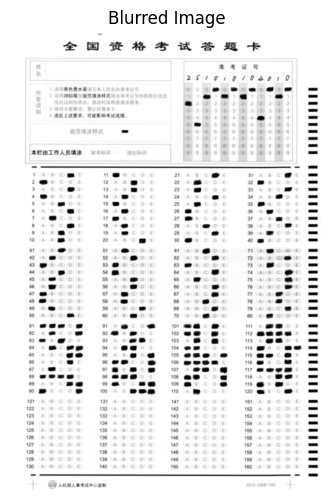

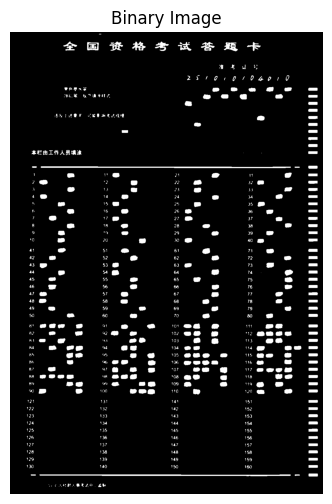

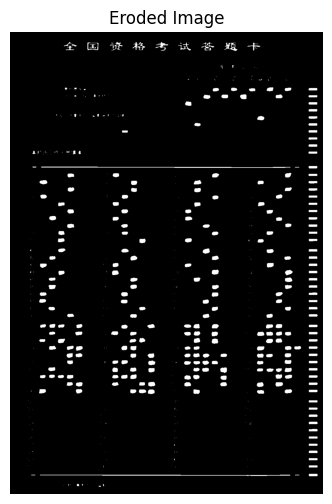

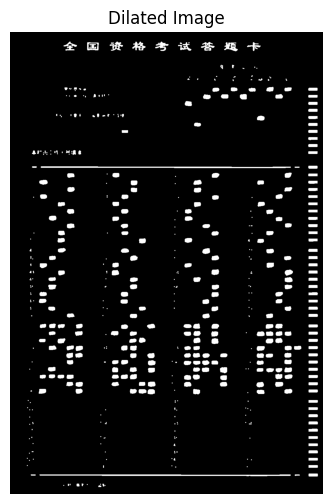

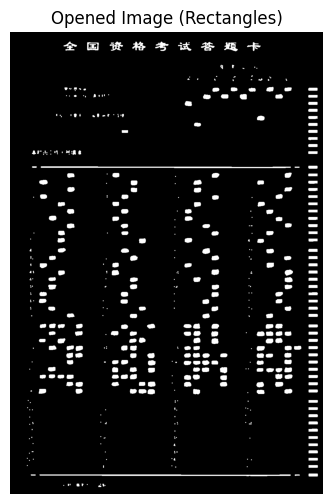

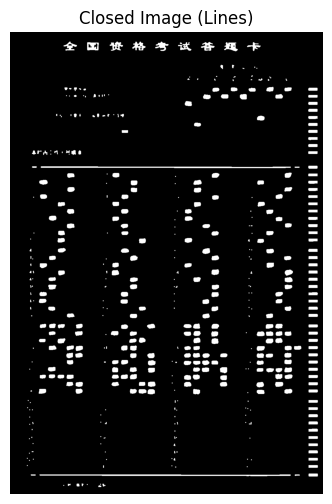

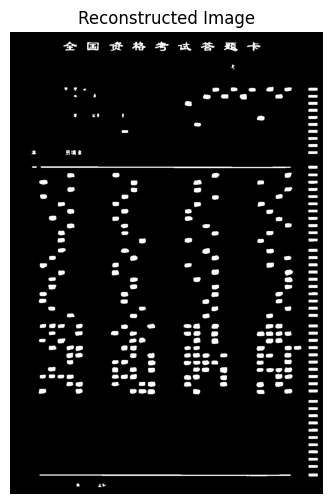

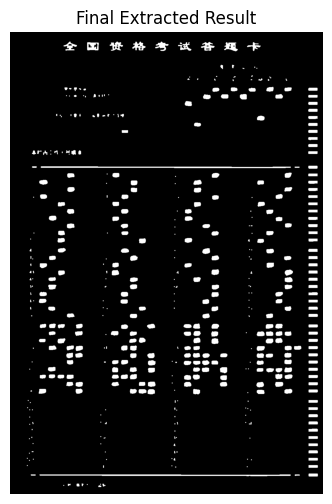

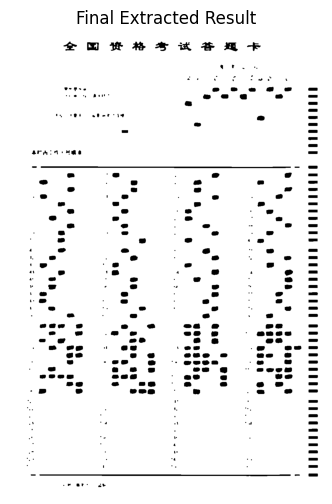

Result saved as 'output_image.jpg'


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 显示图像的函数
def display_image(title, img, cmap='gray'):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

# 1. 加载图像
image = cv2.imread('/home/curry/code/curry_code_summay/homework/shuzituxiangchbuli/251010104010.jpg', cv2.IMREAD_GRAYSCALE)
display_image("Original Image", image)

# 2. 图像预处理
# 高斯滤波去噪
blurred = cv2.GaussianBlur(image, (5, 5), 0)
display_image("Blurred Image", blurred)

# 3. 阈值分割
# 使用Otsu法自动选择阈值
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
display_image("Binary Image", binary)

# 4. 形态学处理
# 腐蚀操作去除小噪声
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
eroded = cv2.erode(binary, kernel, iterations=1)
display_image("Eroded Image", eroded)

# 膨胀操作还原目标形状
dilated = cv2.dilate(eroded, kernel, iterations=1)
display_image("Dilated Image", dilated)

# 开运算提取矩形块
opened = cv2.morphologyEx(dilated, cv2.MORPH_OPEN, kernel)
display_image("Opened Image (Rectangles)", opened)

# 闭运算连接断裂线条
closed = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel)
display_image("Closed Image (Lines)", closed)

# 5. 灰度重建（可选）
# 使用掩膜重建提取黑色目标区域
marker = cv2.erode(binary, kernel, iterations=2)
from skimage.morphology import reconstruction
reconstructed = reconstruction(marker, binary)
display_image("Reconstructed Image", reconstructed)

# 6. 合并提取结果
final_result = cv2.bitwise_or(opened, closed)
display_image("Final Extracted Result", final_result)

#将背景设置为白色，其他变成黑色
final_result = cv2.bitwise_not(final_result)
display_image("Final Extracted Result", final_result)

# 7. 保存结果
cv2.imwrite('output_image.jpg', final_result)
print("Result saved as 'output_image.jpg'")
